In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime
from sklearn import preprocessing

In [2]:
data=pd.read_csv("carprice.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.shape

(4340, 8)

In [5]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
current_year = datetime.datetime.now().year

In [8]:
data=data.rename(columns={'year':'age_of_car'})

In [9]:
data['age_of_car']=current_year-data['age_of_car']

In [10]:
label_encoder=preprocessing.LabelEncoder()

In [11]:
data['fuel_encoded']=label_encoder.fit_transform(data['fuel'])

In [12]:
print(data['fuel'].values)

['Petrol' 'Petrol' 'Diesel' ... 'Petrol' 'Diesel' 'Petrol']


In [13]:
print(data['fuel_encoded'].values)

[4 4 1 ... 4 1 4]


In [14]:
print("Mapping of original to encoded values for 'fuel':")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(original,":",encoded)

Mapping of original to encoded values for 'fuel':
CNG : 0
Diesel : 1
Electric : 2
LPG : 3
Petrol : 4


In [15]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [16]:
data['seller_type_encoded']=label_encoder.fit_transform(data['seller_type'])

In [17]:
print("Mapping of original to encoded values for 'seller_type':")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(original,":",encoded)

Mapping of original to encoded values for 'seller_type':
Dealer : 0
Individual : 1
Trustmark Dealer : 2


In [18]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
data['transmission']=label_encoder.fit_transform(data['transmission'])

In [20]:
print("Mapping of original to encoded values for 'transmission':")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(original,":",encoded)

Mapping of original to encoded values for 'transmission':
Automatic : 0
Manual : 1


In [21]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [22]:
data['owner_encoded']=label_encoder.fit_transform(data['owner'])

In [23]:
print("Mapping of original to encoded values for 'owner':")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(original,":",encoded)

Mapping of original to encoded values for 'owner':
First Owner : 0
Fourth & Above Owner : 1
Second Owner : 2
Test Drive Car : 3
Third Owner : 4


In [24]:
data['brand']=data['name'].apply(lambda i:i.split()[0])

In [25]:
data['brand_encoded']=label_encoder.fit_transform(data['brand'])

In [26]:
print("Mapping of original to encoded values for 'brand':")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(original,":",encoded)

Mapping of original to encoded values for 'brand':
Ambassador : 0
Audi : 1
BMW : 2
Chevrolet : 3
Daewoo : 4
Datsun : 5
Fiat : 6
Force : 7
Ford : 8
Honda : 9
Hyundai : 10
Isuzu : 11
Jaguar : 12
Jeep : 13
Kia : 14
Land : 15
MG : 16
Mahindra : 17
Maruti : 18
Mercedes-Benz : 19
Mitsubishi : 20
Nissan : 21
OpelCorsa : 22
Renault : 23
Skoda : 24
Tata : 25
Toyota : 26
Volkswagen : 27
Volvo : 28


In [27]:
data.head()

,name,age_of_car,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_encoded,seller_type_encoded,owner_encoded,brand,brand_encoded
0,Maruti 800 AC,17,60000,70000,Petrol,Individual,1,First Owner,4,1,0,Maruti,18
1,Maruti Wagon R LXI Minor,17,135000,50000,Petrol,Individual,1,First Owner,4,1,0,Maruti,18
2,Hyundai Verna 1.6 SX,12,600000,100000,Diesel,Individual,1,First Owner,1,1,0,Hyundai,10
3,Datsun RediGO T Option,7,250000,46000,Petrol,Individual,1,First Owner,4,1,0,Datsun,5
4,Honda Amaze VX i-DTEC,10,450000,141000,Diesel,Individual,1,Second Owner,1,1,2,Honda,9


In [28]:
data.drop(columns=["owner","name","seller_type","fuel","brand"],inplace=True)

In [29]:
data.dtypes

age_of_car             int64
selling_price          int64
km_driven              int64
transmission           int64
fuel_encoded           int64
seller_type_encoded    int64
owner_encoded          int64
brand_encoded          int64
dtype: object

In [30]:
data.isnull().sum()

age_of_car             0
selling_price          0
km_driven              0
transmission           0
fuel_encoded           0
seller_type_encoded    0
owner_encoded          0
brand_encoded          0
dtype: int64

In [31]:
data['selling_price']=np.log(data['selling_price'])

In [32]:
cols=["age_of_car","km_driven","transmission","fuel_encoded","seller_type_encoded","owner_encoded","brand_encoded"]

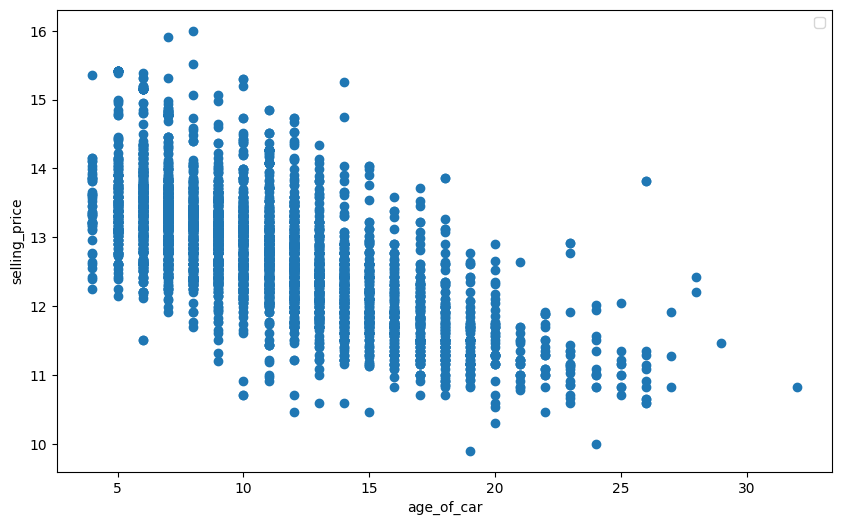

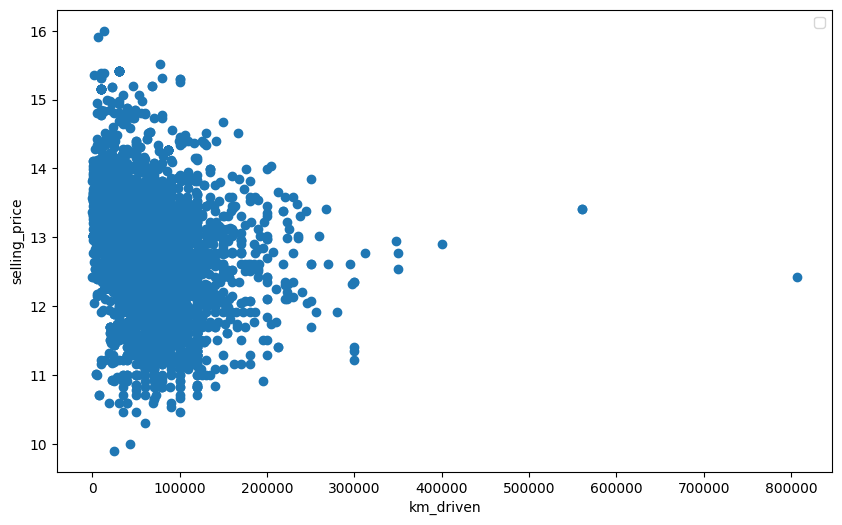

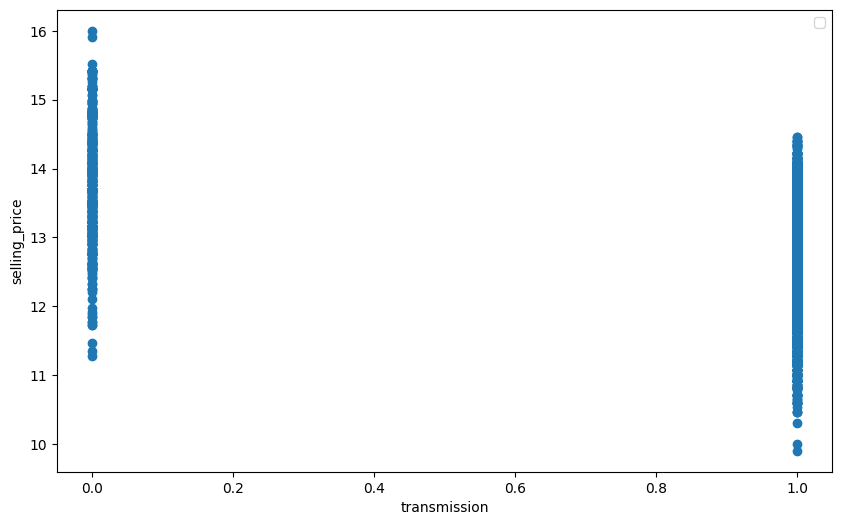

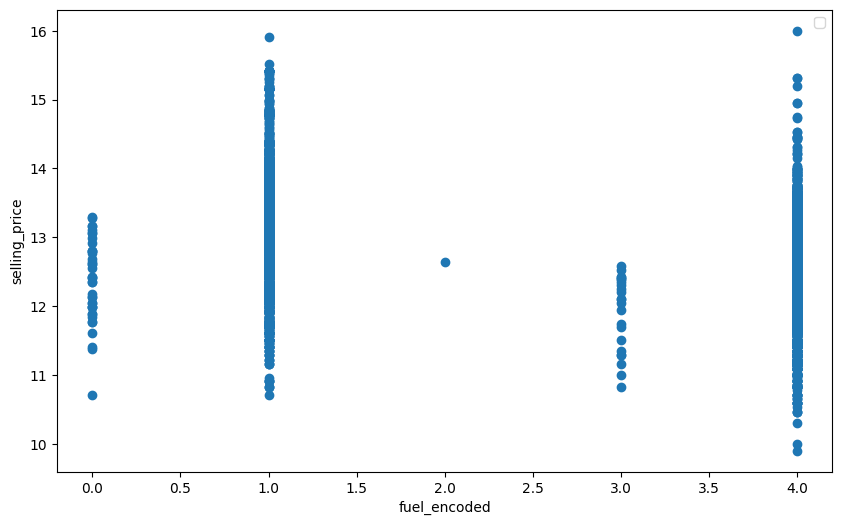

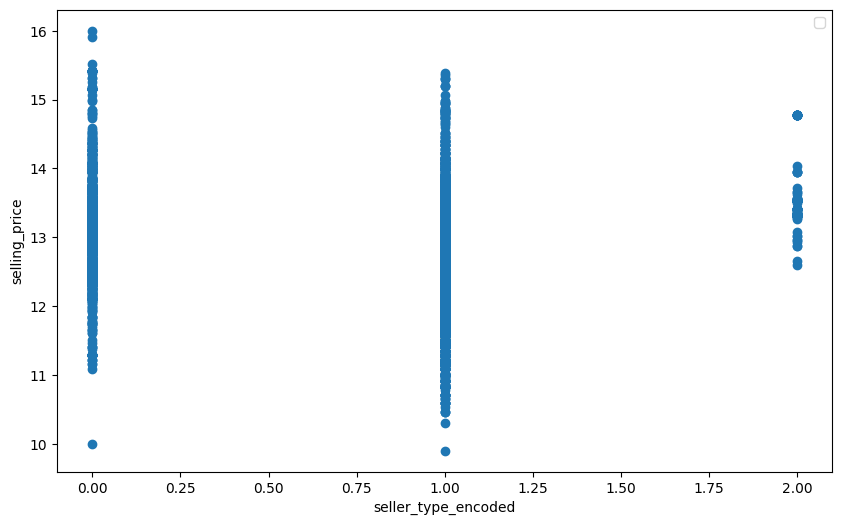

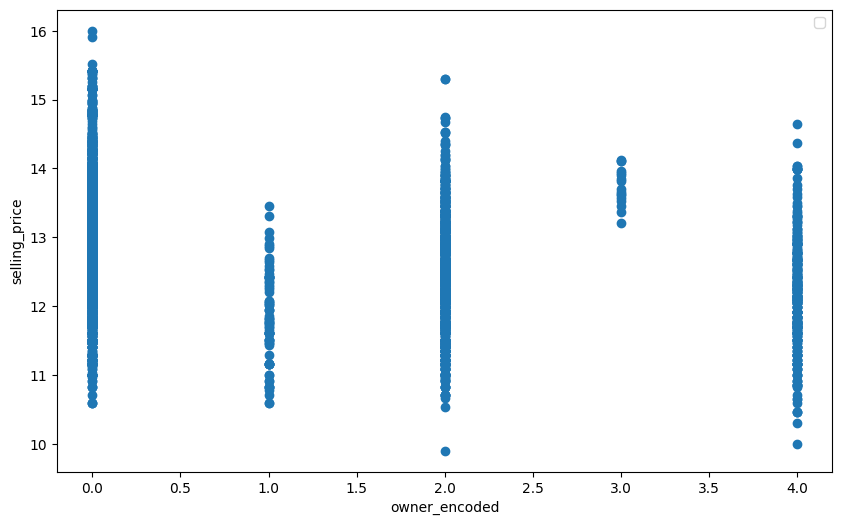

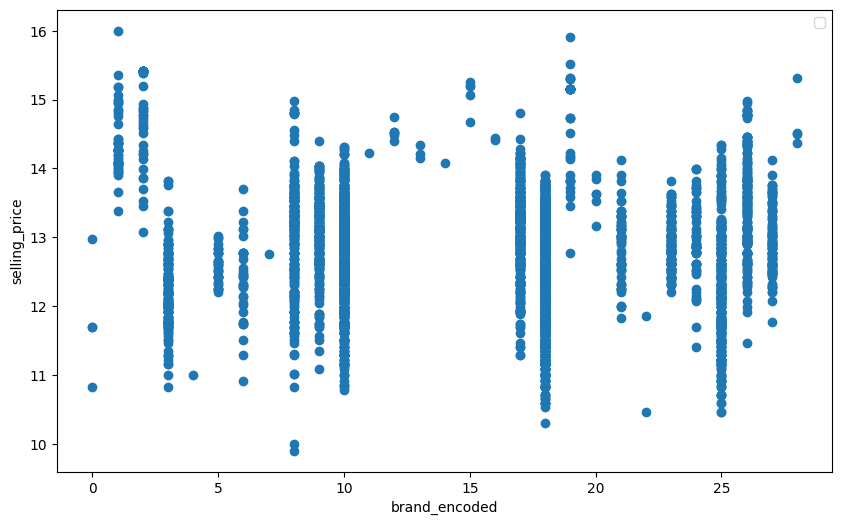

In [33]:
for i in cols:
  plt.figure(figsize=(10,6))
  plt.scatter(data[i],data['selling_price'])
  plt.xlabel(i)
  plt.ylabel('selling_price')
  plt.legend()
  plt.show()

In [34]:
all_cols=["age_of_car","transmission","fuel_encoded","seller_type_encoded","owner_encoded","km_driven","brand_encoded"]

In [35]:
for i in all_cols:
  correlation=data['selling_price'].corr(data[i])
  print('Correlation between target and',i,'is',correlation)

Correlation between target and age_of_car is -0.6957226522276005
Correlation between target and transmission is -0.4135127052194991
Correlation between target and fuel_encoded is -0.3678044537666952
Correlation between target and seller_type_encoded is -0.17041547700026594
Correlation between target and owner_encoded is -0.3250765629878849
Correlation between target and km_driven is -0.24270015651112967
Correlation between target and brand_encoded is -0.07008819063450897


In [36]:
X=data.drop(['selling_price'],axis=1)
y=data['selling_price']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [38]:
print(X.shape,x_train.shape,x_test.shape)

(4340, 7) (3472, 7) (868, 7)


In [39]:
data.isnull().sum()

age_of_car             0
selling_price          0
km_driven              0
transmission           0
fuel_encoded           0
seller_type_encoded    0
owner_encoded          0
brand_encoded          0
dtype: int64

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
model=RandomForestRegressor()

In [62]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

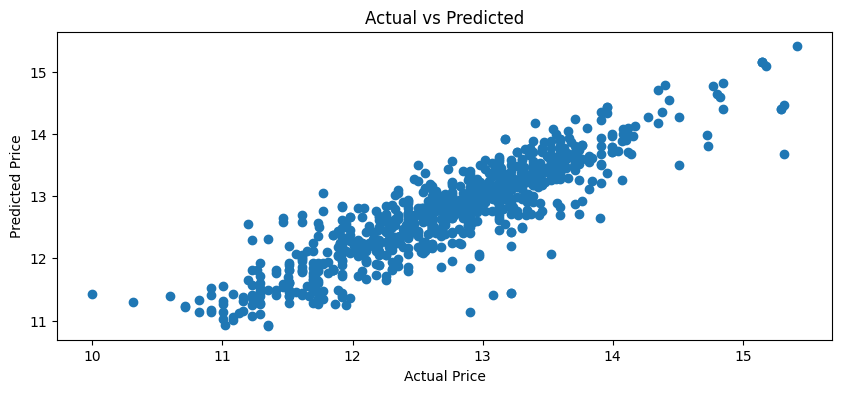

In [74]:
plt.figure(figsize=(10,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [75]:
mae=metrics.mean_absolute_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=metrics.mean_squared_error(y_test,y_pred,squared=False)

In [76]:
print('MEAN ABSOLUTE ERROR',mae)
print('MEAN SQUARED ERROR',mse)
print('ROOT MEAN SQUARED ERROR',rmse)
print('R-SQUARED',r2)

MEAN ABSOLUTE ERROR 0.2648248577761598
MEAN SQUARED ERROR 0.1417711761985989
ROOT MEAN SQUARED ERROR 0.3765251335549845
R-SQUARED 0.7874637578649073
